## Node2Vec
### **I. Compréhension**  
**Objectif** :  
Node2Vec est une méthode pour apprendre des **représentations vectorielles** (embeddings) des nœuds d'un graphe, utiles pour des tâches comme :  
- **Classification de nœuds** (ex : prédire le rôle d'un utilisateur dans un réseau social).  
- **Prédiction de liens** (ex : deviner quelles amitiés vont se former).  

**Idée clé** :  
- Inspiré par Word2Vec (Skip-gram) en NLP, mais adapté aux graphes.  
- Utilise des **marches aléatoires biaisées** pour explorer le graphe, avec deux paramètres :  
  - **`p`** (retour) : Contrôle la probabilité de revenir au nœud précédent.  
  - **`q`** (exploration) : Favorise la recherche en largeur (BFS) ou en profondeur (DFS).  
- Combine deux principes :  
  - **Homophilie** : Nœuds similaires (même communauté) proches dans l'espace vectoriel.  
  - **Équivalence structurelle** : Nœuds avec des rôles similaires (ex : hubs) proches.  

**Avantages** :  
- Plus flexible que DeepWalk (marches uniformes) ou LINE (voisinages rigides).  
- Scalable (parallélisable) et robuste aux graphes incomplets/bruités.  

---

### **II. Points Clés Implémentés**  
Ce projet se concentre sur :  

#### **A. Marches Aléatoires Biaisées**  
- **Paramètres `p` et `q`** :  
  - Si `p` est petit, la marche reste locale (équivalence structurelle).  
  - Si `q` est petit, la marche explore loin (homophilie).  
- **Transition entre nœuds** :  
  - La probabilité de passer de `v` à `x` dépend du nœud précédent `t` :  
    - `d(t, x) = 0` (retour à `t`) → poids = `1/p`.  
    - `d(t, x) = 1` (voisin de `t`) → poids = `1`.  
    - `d(t, x) = 2` (nouveau nœud) → poids = `1/q`.  

#### **B. Modèle Skip-Gram**  
- **Entrée** : Séquences de nœuds générées par les marches.  
- **Sortie** : Vecteurs qui maximisent la probabilité des voisinages.  
- **Optimisation** : SGD avec échantillonnage négatif (comme Word2Vec).  

#### **C. Étapes Simplifiées**  
1. **Prétraitement** : Calculer les probabilités de transition.  
2. **Génération des marches** : Simuler des marches biaisées.  
3. **Apprentissage** : Entraîner un modèle Skip-Gram sur les marches.

### **III. Implémentation**
Ce notebook permet d'entraîner et d'explorer les embeddings appris avec **Node2Vec** sur un graphe simple (**Karate Club**).  
Il utilise le fichier `train.py` pour encapsuler la logique d'entraînement.

### Contenu :
1. Chargement des modules et du graphe.
2. Entraînement du modèle avec différentes configurations.
3. Visualisation des embeddings en 2D avec **PCA**.


### 1. Chargement des modules et du graphe
Nous importons `train_node2vec` depuis `train.py`, ainsi que `load_karate_club` pour obtenir notre graphe d'entraînement.


In [1]:
from train import train_node2vec
from utils import load_karate_club
import matplotlib.pyplot as plt
import numpy as np


In [2]:
G, labels, label2idx = load_karate_club()


### 2. Entraînement du modèle
Nous lançons l'entraînement de **Node2Vec** en utilisant les hyperparamètres suivants :
- Dimension des embeddings : `64`
- Fenêtre de contexte : `3`
- Paramètre `p` (return) : `0.5`
- Paramètre `q` (exploration) : `4`
- Nombre de négatifs : `3`
- Nombre d'époques : `30`


In [3]:
embeddings, node2idx, loss_history = train_node2vec(
    G,
    embed_dim=64,
    epochs=30,
    window_size=3,
    p=0.5,
    q=4,
    num_neg=3
)



 Using device: cpu
 Exploration params: p=0.5 (return), q=4 (exploration)

Epoch 001 | Loss: 1.1976 | LR: 0.000250
Epoch 002 | Loss: 1.0096 | LR: 0.000250
Epoch 003 | Loss: 0.9390 | LR: 0.000250
Epoch 004 | Loss: 0.9175 | LR: 0.000250
Epoch 005 | Loss: 0.9106 | LR: 0.000250
Epoch 006 | Loss: 0.9072 | LR: 0.000250
Epoch 007 | Loss: 0.9040 | LR: 0.000250
Epoch 008 | Loss: 0.9022 | LR: 0.000250
Epoch 009 | Loss: 0.9000 | LR: 0.000250
Epoch 010 | Loss: 0.8997 | LR: 0.000250
Epoch 011 | Loss: 0.8992 | LR: 0.000250
Epoch 012 | Loss: 0.8988 | LR: 0.000250
Epoch 013 | Loss: 0.8961 | LR: 0.000250
Epoch 014 | Loss: 0.8962 | LR: 0.000250
Epoch 015 | Loss: 0.8963 | LR: 0.000250
Epoch 016 | Loss: 0.8940 | LR: 0.000250
Epoch 017 | Loss: 0.8952 | LR: 0.000250
Epoch 018 | Loss: 0.8954 | LR: 0.000250
Epoch 019 | Loss: 0.8940 | LR: 0.000250
Epoch 020 | Loss: 0.8925 | LR: 0.000250
Epoch 021 | Loss: 0.8949 | LR: 0.000250
Epoch 022 | Loss: 0.8947 | LR: 0.000250
Epoch 023 | Loss: 0.8933 | LR: 0.000250
Epoc

e:\GRAPHE-mining\Projet\src\train.py:93: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load('../results/best_model.pt', map_location='cpu')


### 📉 4. Courbe de Training Loss
Nous affichons l'évolution de la perte au fil des époques pour vérifier la bonne convergence du modèle.


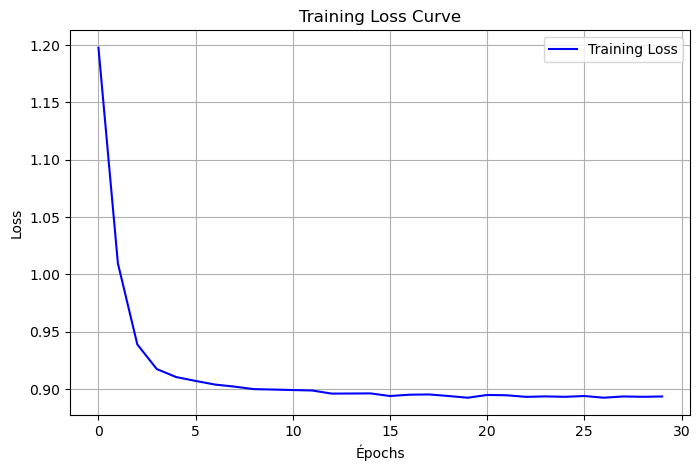

In [4]:
# Affichage de la courbe de Training Loss
plt.figure(figsize=(8,5))
plt.plot(loss_history, label="Training Loss", color='b')
plt.xlabel("Épochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.legend()
plt.grid(True)
plt.show()


### 📊 3. Visualisation des embeddings
Nous utilisons **PCA** pour réduire la dimension des embeddings de `64D` à `2D`, puis nous affichons les nœuds sous forme de scatter plot.


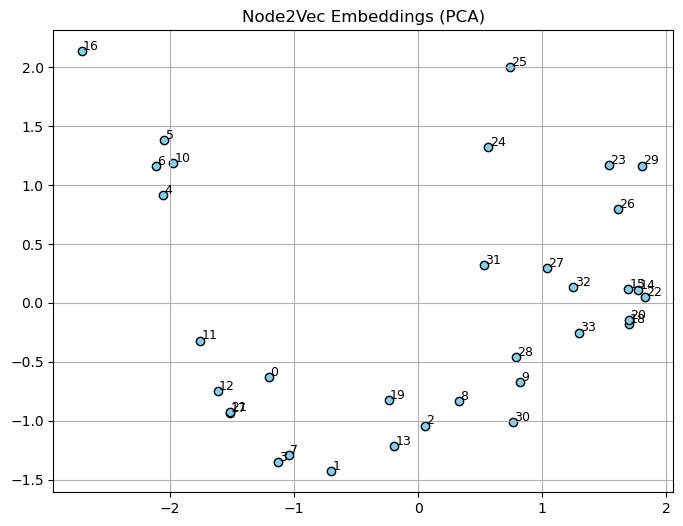

In [5]:
# Cell 4 : Visualisation simple en 2D avec PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

plt.figure(figsize=(8,6))
plt.scatter(embeddings_2d[:,0], embeddings_2d[:,1], c='skyblue', edgecolors='k')
for node, idx in node2idx.items():
    plt.text(embeddings_2d[idx,0]+0.01, embeddings_2d[idx,1]+0.01, str(node), fontsize=9)
plt.title("Node2Vec Embeddings (PCA)")
plt.grid(True)
plt.show()
